In [2]:
using DifferentialEquations
using Plots

struct Circuit
    capacitance::Float64 
    resistance::Float64 
    inductance::Float64 
    voltage::Float64 
    angular_frequency::Float64 
end

# Parameters of the circuit
C = 1e-3    # Capacitance (F)
R = 100      # Resistance (Ω)
L = 1e-3     # Inductance (H)
V₀ = 10.0   # Voltage amplitude (V)
f = 60.0     # Frequency (Hz)
ω = 2 * π * f # Angular frequency

# Creating the circuit 
circuit1 = Circuit(C, R, L, V₀, ω)

# Define o sistema de EDO'S
function circuit_ode(du, u, p, t)
    I_RL, I_C = u
    du[1] = (V₀ * sin(ω * t) - I_RL * circuit1.resistance) / circuit1.inductance       # dI_RL/dt (corrente através de R e L)
    du[2] = - circuit1.capacitance * (V₀ * ω^2 * sin(ω * t))     # dI_C/dt (corrente através de C)
end

circuit_ode (generic function with 1 method)

In [3]:
# Condições iniciais: I_RL(0), I_C(0)
I_c_0 = circuit1.capacitance * circuit1.voltage * circuit1.angular_frequency
I_rl_0 = - circuit1.voltage * sin(atan((circuit1.angular_frequency * circuit1.inductance)/circuit1.resistance)) / sqrt(circuit1.resistance^2 + (circuit1.angular_frequency * circuit1.inductance)^2)
u0 = [I_rl_0, I_c_0]

# Intervalo de tempo
tspan = (0.0, 0.1)

# Resolve as EDO'S
prob = ODEProblem(circuit_ode, u0, tspan)
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 2852-element Vector{Float64}:
 0.0
 3.786100677044174e-5
 7.706931695094122e-5
 0.00013342010481921047
 0.00017643515502682784
 0.00021476843857112546
 0.00025012531652803406
 0.000284166797534216
 0.0003181390749191712
 0.00035265607253897257
 ⋮
 0.099749821406823
 0.09978442613765784
 0.09981895521161505
 0.09985338941593475
 0.09988770133710771
 0.09992184995997822
 0.09995577009143888
 0.09998934994837237
 0.1
u: 2852-element Vector{Vector{Float64}}:
 [-0.0003769857606223112, 3.7699111843077517]
 [0.0010503188529758034, 3.769527176279645]
 [0.0025281603199292448, 3.7683200903407]
 [0.004650157658635591, 3.7651434246645694]
 [0.006266472402145712, 3.7615748814312724]
 [0.007704965003397016, 3.7575611826183963]
 [0.009032721543720767, 3.7531634198920574]
 [0.010311179149055763, 3.7482992002313567]
 [0.011585201515442848, 3.7428294338664148]
 [0.012877034664024343, 3.736643213504603]
 ⋮
 [-0.0097972952052819

In [47]:
function analytical_c_current(t, C, V₀, ω)
    return C * V₀ * ω * cos(ω * t)
end 

function analytical_rl_current(t, V₀, ω, R, L)
    ϕ = atan((circuit1.angular_frequency * circuit1.inductance)/circuit1.resistance)

    return circuit1.voltage * sin(ω * t - ϕ) / sqrt(circuit1.resistance^2 + (circuit1.angular_frequency * circuit1.inductance)^2)
end

time = range(0, stop=0.1, length=200)
current_c = []
current_rl = []

for i in time
    push!(current_c, analytical_c_current(i, circuit1.capacitance, circuit1.voltage, circuit1.angular_frequency))
    push!(current_rl, analytical_rl_current(i, circuit1.voltage, circuit1.angular_frequency, circuit1.resistance, circuit1.inductance ))
end

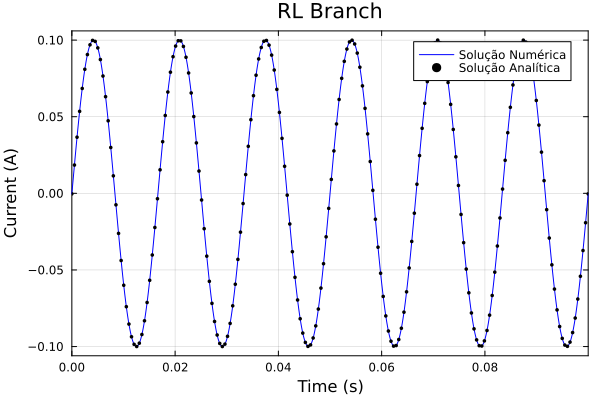

In [48]:
plot(sol, idxs=1,  xlabel = "Time (s)", ylabel = "Current (A)", title = "RL Branch", label="Solução Numérica",  color=:blue,  framestyle=:box, legend=:topright)
scatter!(time, current_rl, label="Solução Analítica", color=:black, markersize=2)

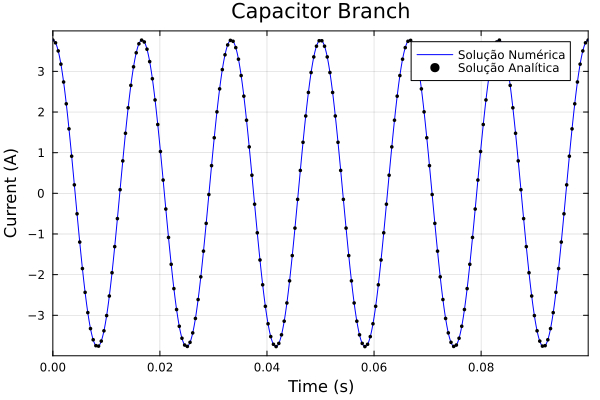

In [49]:
plot(sol, idxs=2, xlabel = "Time (s)", ylabel = "Current (A)", title = "Capacitor Branch", label="Solução Numérica", color=:blue,  framestyle=:box, legend=:topright)
scatter!(time, current_c, label="Solução Analítica", color=:black, markersize=2)